# a)


In [391]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [392]:

tsla_stk = pd.read_csv("TSLA.csv")
tsla_stk


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200
1,2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100
2,2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100
3,2021-10-21,856.000000,900.000000,855.500000,894.000000,894.000000,31481500
4,2021-10-22,895.500000,910.000000,890.960022,909.679993,909.679993,22880800
5,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100
6,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000
7,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500
8,2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200
9,2021-10-29,1081.859985,1115.209961,1073.209961,1114.000000,1114.000000,29918400


In [393]:
tsla_stk.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [394]:
tsla_stk['Date'] = pd.to_datetime(tsla_stk['Date'])
tsla_stk['avg_stockprice'] = tsla_stk.drop(['Volume'], axis=1).mean(axis='columns')
tsla_stk

,Date,Open,High,Low,Close,Adj Close,Volume,avg_stockprice
0,2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200,863.747986
1,2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100,869.306018
2,2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100,864.763989
3,2021-10-21,856.000000,900.000000,855.500000,894.000000,894.000000,31481500,879.900000
4,2021-10-22,895.500000,910.000000,890.960022,909.679993,909.679993,22880800,903.164002
5,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100,997.894006
6,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000,1031.585974
7,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500,1043.408008
8,2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200,1071.518018
9,2021-10-29,1081.859985,1115.209961,1073.209961,1114.000000,1114.000000,29918400,1099.655981


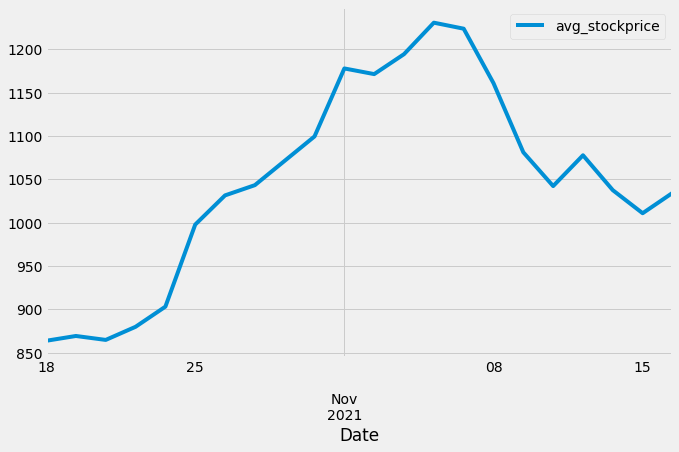

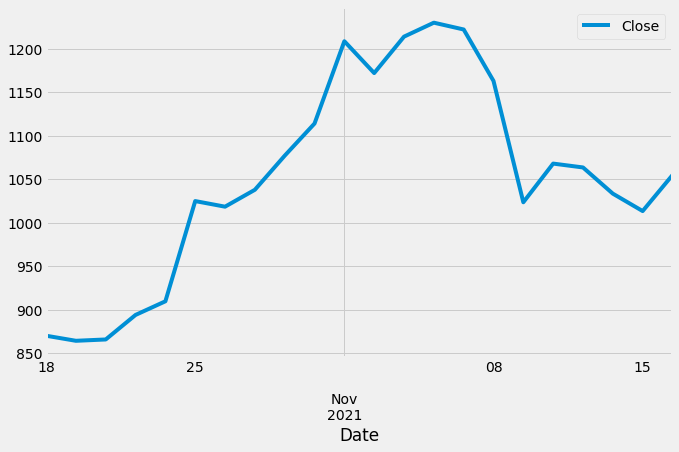

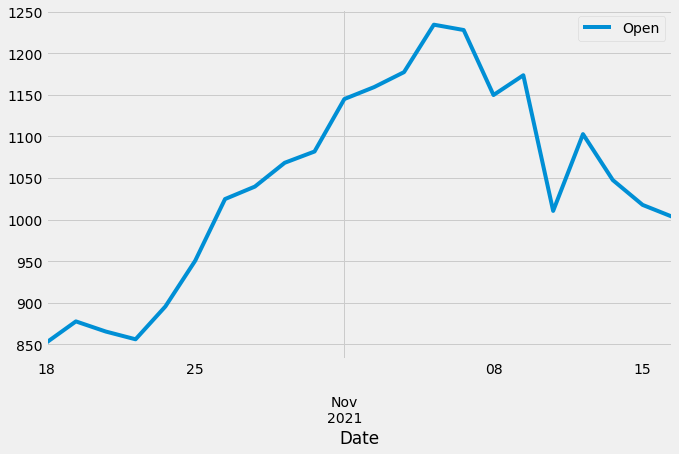

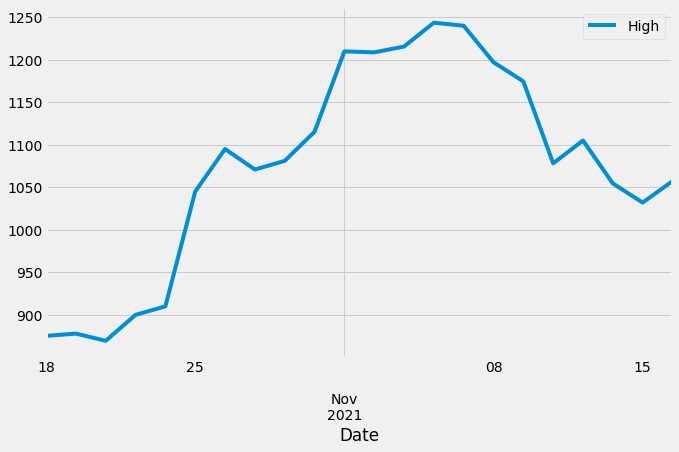

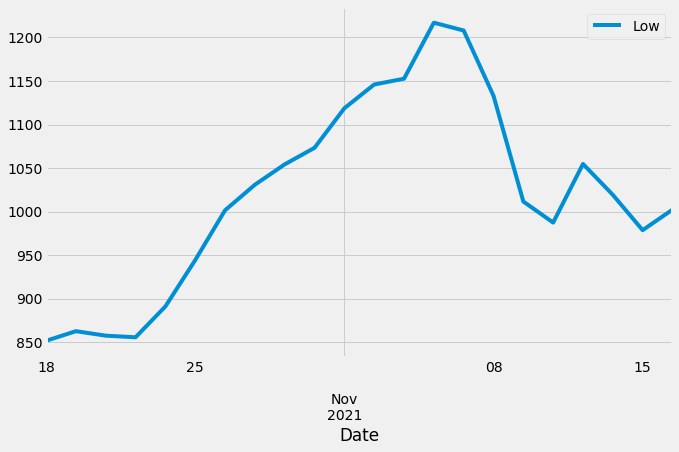

In [395]:
tsla_stk.plot(x="Date", y="avg_stockprice");
tsla_stk.plot(x="Date", y="Close");
tsla_stk.plot(x="Date", y="Open");
tsla_stk.plot(x="Date", y="High");
tsla_stk.plot(x="Date", y="Low");

# b)

In [396]:
tsla_stk['year'] = pd.DatetimeIndex(tsla_stk['Date']).year
tsla_stk['month'] = pd.DatetimeIndex(tsla_stk['Date']).month
tsla_stk['day'] = pd.DatetimeIndex(tsla_stk['Date']).day
tsla_stk

,Date,Open,High,Low,Close,Adj Close,Volume,avg_stockprice,year,month,day
0,2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200,863.747986,2021,10,18
1,2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100,869.306018,2021,10,19
2,2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100,864.763989,2021,10,20
3,2021-10-21,856.000000,900.000000,855.500000,894.000000,894.000000,31481500,879.900000,2021,10,21
4,2021-10-22,895.500000,910.000000,890.960022,909.679993,909.679993,22880800,903.164002,2021,10,22
5,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100,997.894006,2021,10,25
6,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000,1031.585974,2021,10,26
7,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500,1043.408008,2021,10,27
8,2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200,1071.518018,2021,10,28
9,2021-10-29,1081.859985,1115.209961,1073.209961,1114.000000,1114.000000,29918400,1099.655981,2021,10,29


In [397]:
#tsla_stk=pd.DataFrame(tsla_stk)

In [398]:
#tsla_stk=tsla_stk.set_index('Date')

In [399]:
#tsla_stk

In [400]:
tsla_stk.dtypes;


In [401]:
tsla_stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
Date              22 non-null datetime64[ns]
Open              22 non-null float64
High              22 non-null float64
Low               22 non-null float64
Close             22 non-null float64
Adj Close         22 non-null float64
Volume            22 non-null int64
avg_stockprice    22 non-null float64
year              22 non-null int64
month             22 non-null int64
day               22 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 2.0 KB


In [402]:
tsla_stk = tsla_stk.rename(columns={"avg_stockprice": "price"})

In [403]:
tsla_stk['Date'] = pd.to_datetime(tsla_stk['Date'])

In [404]:
tsla_stk.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
price               float64
year                  int64
month                 int64
day                   int64
dtype: object

In [405]:
tsla_stk=tsla_stk.sort_index(ascending=True)

In [406]:
train_size = int(len(tsla_stk) * 0.7)
test_size = len(tsla_stk) - train_size

train, test = tsla_stk[0:train_size], tsla_stk[train_size:len(tsla_stk)]

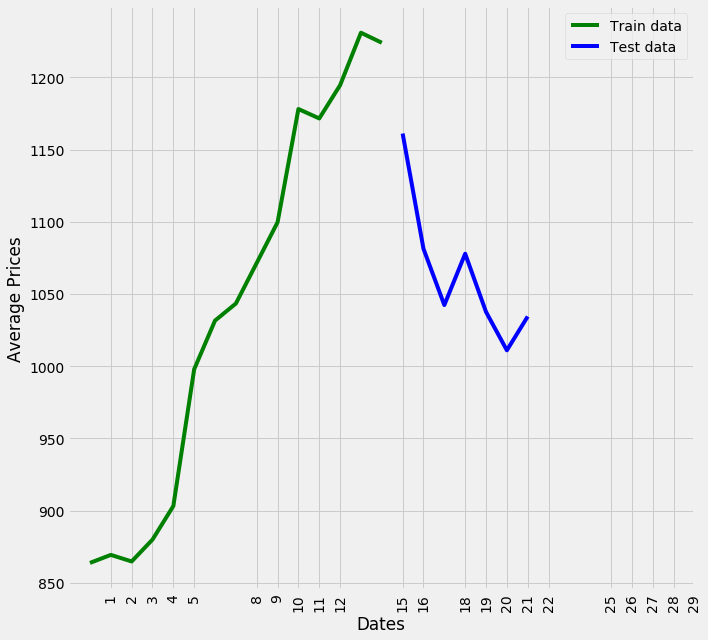

In [421]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Average Prices')
plt.plot(train['price'], 'green', label='Train data')
plt.plot(test['price'], 'blue', label='Test data')
plt.xticks(tsla_stk.day, rotation=90)
plt.legend()
plt.show()

In [408]:
tsla_stk['year'] = pd.DatetimeIndex(tsla_stk['Date']).year
tsla_stk['month'] = pd.DatetimeIndex(tsla_stk['Date']).month
tsla_stk['day'] = pd.DatetimeIndex(tsla_stk['Date']).day
tsla_stk

,Date,Open,High,Low,Close,Adj Close,Volume,price,year,month,day
0,2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200,863.747986,2021,10,18
1,2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100,869.306018,2021,10,19
2,2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100,864.763989,2021,10,20
3,2021-10-21,856.000000,900.000000,855.500000,894.000000,894.000000,31481500,879.900000,2021,10,21
4,2021-10-22,895.500000,910.000000,890.960022,909.679993,909.679993,22880800,903.164002,2021,10,22
5,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100,997.894006,2021,10,25
6,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000,1031.585974,2021,10,26
7,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500,1043.408008,2021,10,27
8,2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200,1071.518018,2021,10,28
9,2021-10-29,1081.859985,1115.209961,1073.209961,1114.000000,1114.000000,29918400,1099.655981,2021,10,29


In [409]:
tsla_stk=pd.DataFrame(tsla_stk)

In [410]:
tsla_stk


,Date,Open,High,Low,Close,Adj Close,Volume,price,year,month,day
0,2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200,863.747986,2021,10,18
1,2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100,869.306018,2021,10,19
2,2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100,864.763989,2021,10,20
3,2021-10-21,856.000000,900.000000,855.500000,894.000000,894.000000,31481500,879.900000,2021,10,21
4,2021-10-22,895.500000,910.000000,890.960022,909.679993,909.679993,22880800,903.164002,2021,10,22
5,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100,997.894006,2021,10,25
6,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000,1031.585974,2021,10,26
7,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500,1043.408008,2021,10,27
8,2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200,1071.518018,2021,10,28
9,2021-10-29,1081.859985,1115.209961,1073.209961,1114.000000,1114.000000,29918400,1099.655981,2021,10,29


In [411]:
tsla_stk = tsla_stk.drop('Date', axis=1)
tsla_stk = tsla_stk.drop('Open', axis=1)
tsla_stk = tsla_stk.drop('High', axis=1)
tsla_stk = tsla_stk.drop('Low', axis=1)
tsla_stk = tsla_stk.drop('Close', axis=1)
tsla_stk = tsla_stk.drop('Volume', axis=1)
tsla_stk = tsla_stk.drop('Adj Close', axis=1)
tsla_stk

,price,year,month,day
0,863.747986,2021,10,18
1,869.306018,2021,10,19
2,864.763989,2021,10,20
3,879.900000,2021,10,21
4,903.164002,2021,10,22
5,997.894006,2021,10,25
6,1031.585974,2021,10,26
7,1043.408008,2021,10,27
8,1071.518018,2021,10,28
9,1099.655981,2021,10,29


In [412]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X_train = train.drop(['price'],axis=1).values
X_test = test.drop(['price'],axis=1).values
y_train = train['price']
y_test = test['price']


In [413]:
X = tsla_stk.drop(['price'],axis=1).values
y = tsla_stk['price']

In [414]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3,validation_fraction=0.2))

In [415]:
reg.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.2, verbose=0,
                              warm_start=False))],
         verbose=False)

In [416]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(15, 10) (7, 10) (15,) (7,)


In [417]:
y_pred=reg.predict(X)

In [418]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

6936.0805037393575

# C)

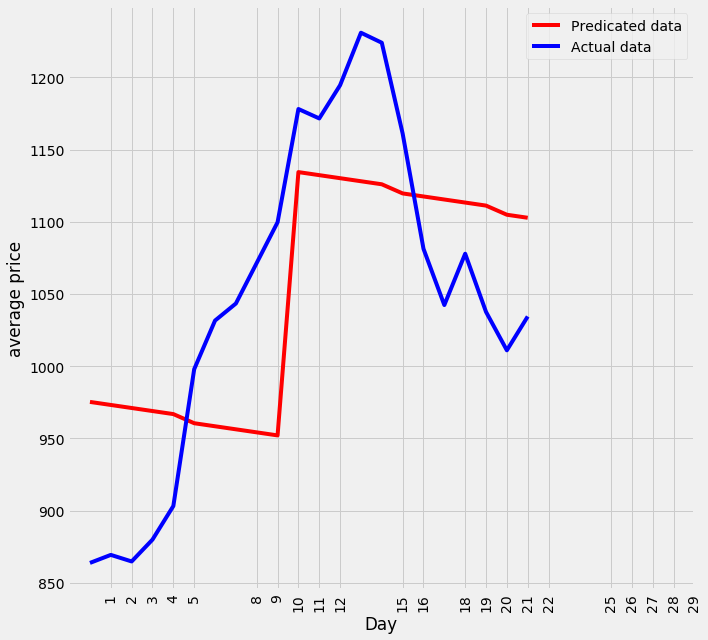

In [360]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Day')
plt.ylabel('average price')
#plt.plot(df.index,df['price'], 'green', label='Train data')
plt.plot(y.index,y_pred, 'red', label='Predicated data')
plt.plot(y.index,y, 'blue', label='Actual data')
plt.xticks(tsla_stk.day, rotation=90)
plt.legend()
plt.show()

In [353]:
!pip install moment


In [354]:
import moment
from datetime import datetime
def dates_bwn_twodates(start_date, end_date):
    diff = abs(start_date.diff(end_date).days)
    
    for n in range(0,diff+1):
        yield start_date.strftime("%Y-%m-%d")
        start_date = (start_date).add(days=1)

sdate = moment.date('2021-11-18')   
edate = moment.date('2022-02-18') 

# d)

In [359]:
predictions_tsla_stk = pd.DataFrame(columns=['Date', 'Avg'])
for date in dates_bwn_twodates(sdate,edate):
    dt = datetime.strptime(date, '%Y-%m-%d')
    val = reg.predict([[dt.year, dt.month, dt.day]])
    print(date, "--", val)
    predictions_tsla_stk.loc[len(predictions_tsla_stk.index)] = [date, val] 

2021-11-18 -- [1098.56872916]
2021-11-19 -- [1096.4600079]
2021-11-20 -- [1094.35128664]
2021-11-21 -- [1092.24256538]
2021-11-22 -- [1090.13384413]
2021-11-23 -- [1088.02512287]
2021-11-24 -- [1085.91640161]
2021-11-25 -- [1083.80768035]
2021-11-26 -- [1081.6989591]
2021-11-27 -- [1079.59023784]
2021-11-28 -- [1077.48151658]
2021-11-29 -- [1075.37279532]
2021-11-30 -- [1073.26407407]
2021-12-01 -- [1257.72729749]
2021-12-02 -- [1255.61857623]
2021-12-03 -- [1253.50985498]
2021-12-04 -- [1251.40113372]
2021-12-05 -- [1249.29241246]
2021-12-06 -- [1247.1836912]
2021-12-07 -- [1245.07496995]
2021-12-08 -- [1242.96624869]
2021-12-09 -- [1240.85752743]
2021-12-10 -- [1238.74880617]
2021-12-11 -- [1236.64008492]
2021-12-12 -- [1234.53136366]
2021-12-13 -- [1232.4226424]
2021-12-14 -- [1230.31392114]
2021-12-15 -- [1228.20519988]
2021-12-16 -- [1226.09647863]
2021-12-17 -- [1223.98775737]
2021-12-18 -- [1221.87903611]
2021-12-19 -- [1219.77031485]
2021-12-20 -- [1217.6615936]
2021-12-21 -- [